
**The following descriptions are adapted from the UCI webpage:**

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

##### Importing libraries 

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#library for clustering
from sklearn.cluster import KMeans

#library for scaling the dataset
from sklearn.preprocessing import StandardScaler

#importing silhouette score
from sklearn.metrics import silhouette_score

#filter warnings
import warnings
warnings.filterwarnings('ignore')


##### Reading in the dataset


In [87]:
wine=pd.read_csv('wine-clustering.csv')

In [88]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [89]:
wine.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [90]:
wine.shape

(178, 13)

**Observations**
- There are 178 rows and 13 columns in the dataset wine


In [91]:
#lets check for any missing or duplicated values

wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [92]:
wine.duplicated().any().sum()

0

In [93]:
wine.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

**Observations**
- There is no missing or duplicated values

In [94]:
#lets decribe the dataset

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


**Observations**
- There are no missing entries as stated earlier
- All data types are numeric type
- There are 178 rows and 13 columns

In [95]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


#### EDA 

Skew : -0.05
Alcohol


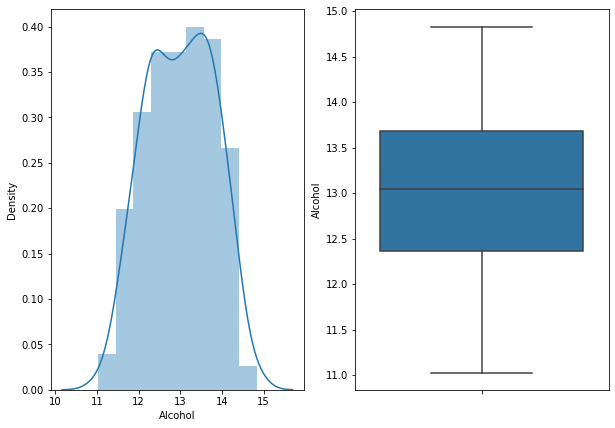

Skew : 1.04
Malic_Acid


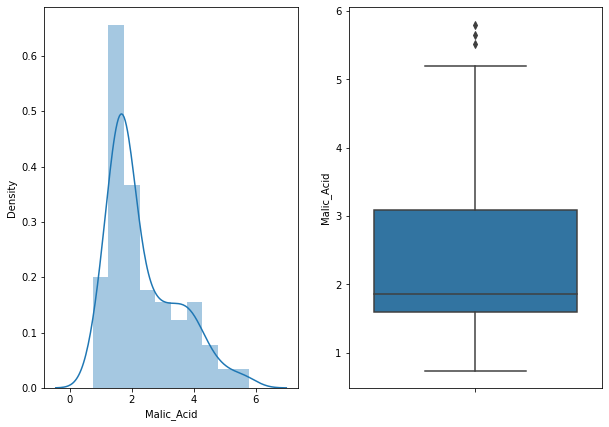

Skew : -0.18
Ash


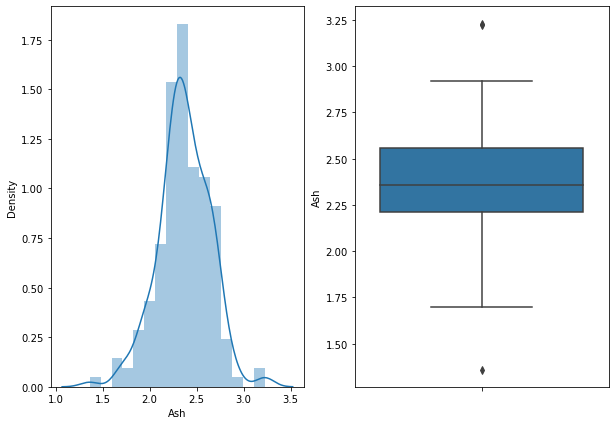

Skew : 0.21
Ash_Alcanity


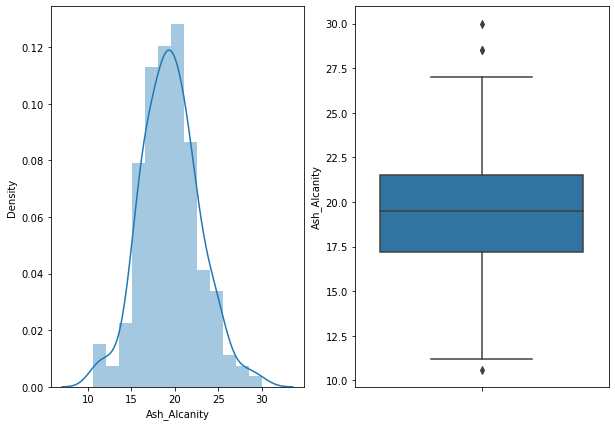

Skew : 1.1
Magnesium


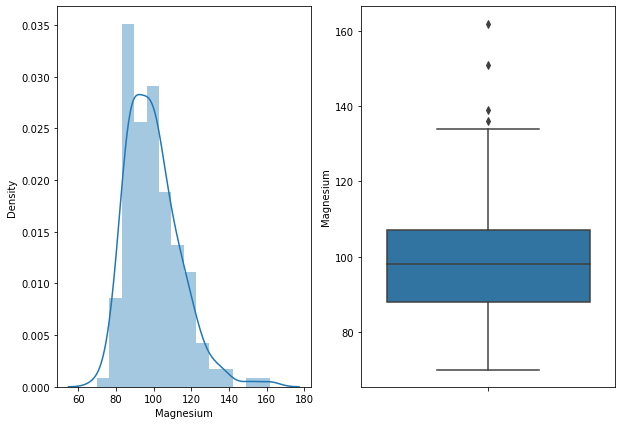

Skew : 0.09
Total_Phenols


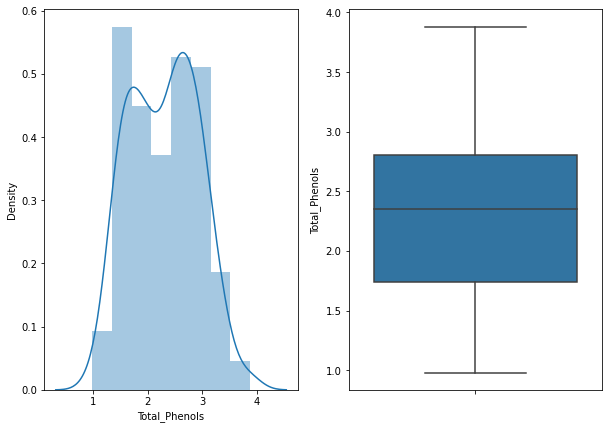

Skew : 0.03
Flavanoids


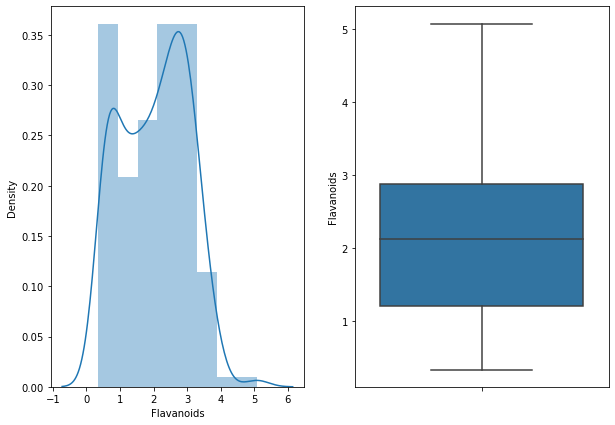

Skew : 0.45
Nonflavanoid_Phenols


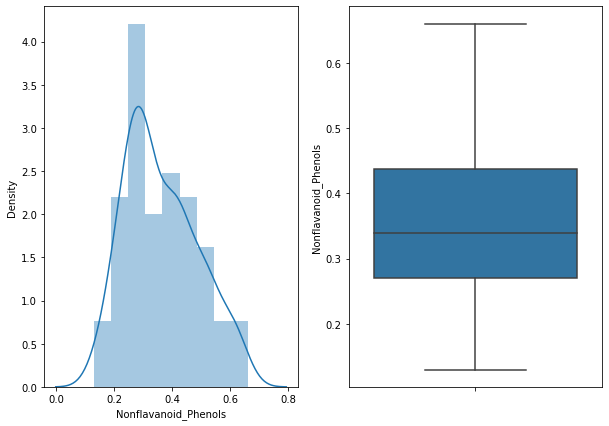

Skew : 0.52
Proanthocyanins


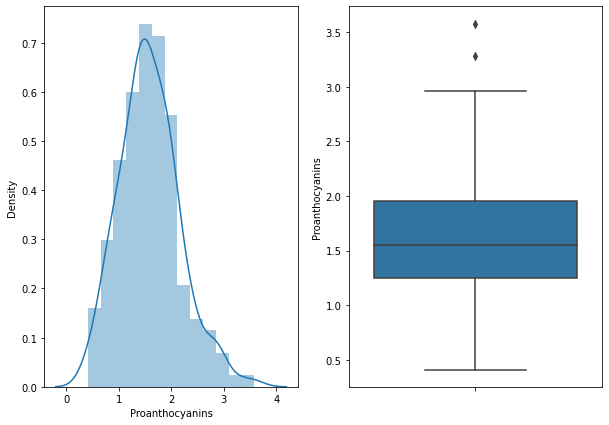

Skew : 0.87
Color_Intensity


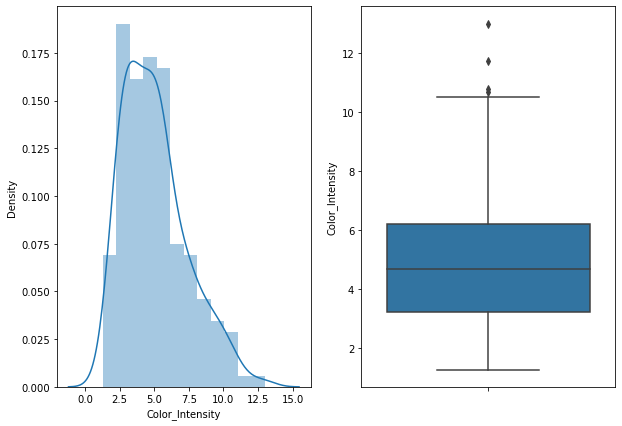

Skew : 0.02
Hue


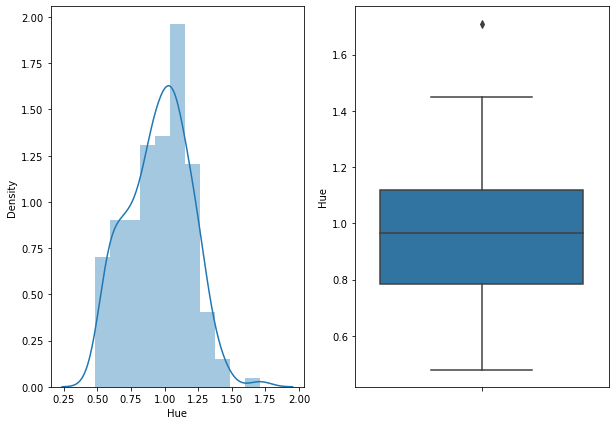

Skew : -0.31
OD280


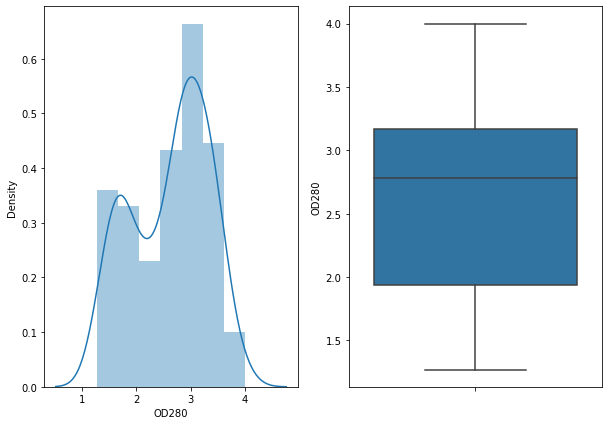

Skew : 0.77
Proline


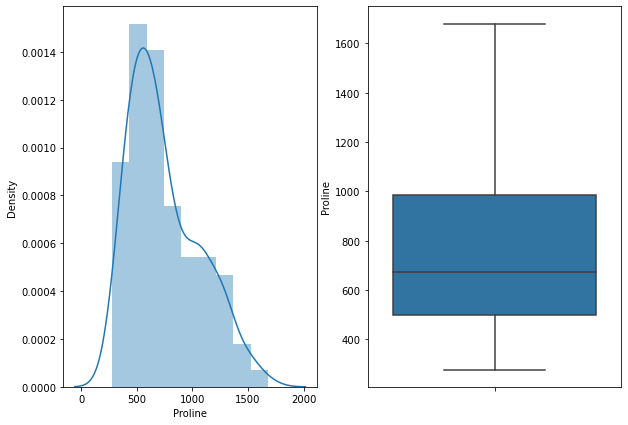

Skew : -0.01
KMeans_Labels


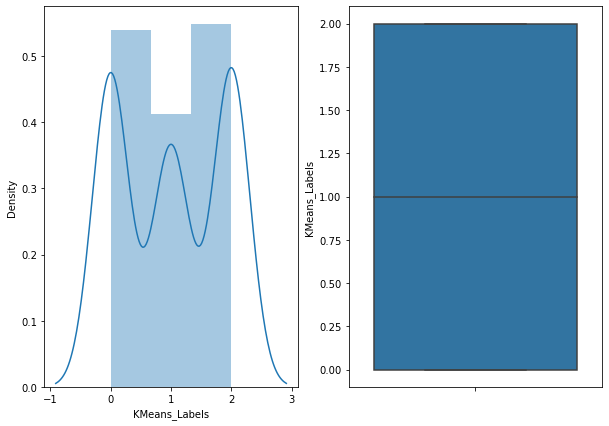

In [162]:
for col in wine.columns:
    print('Skew :', round(wine[col].skew(),2))
    print(col)
    plt.figure(figsize=(10,7))
    plt.subplot(1,2,1)
    sns.distplot(wine[col])
    #wine[col].hist(bins=10)
    plt.subplot(1,2,2)
    sns.boxplot(y=wine[col])
    plt.show()
    

**Observations** 
- Most of the variables are skewed especially to the right with only Ash and OD280 having skews to the left
- There are outliers in majority of the variables except for Alcohol, Total-Phenols, Flavanoids, Non-flavanoids, OD280 and Proline 

#### Checking for correlation

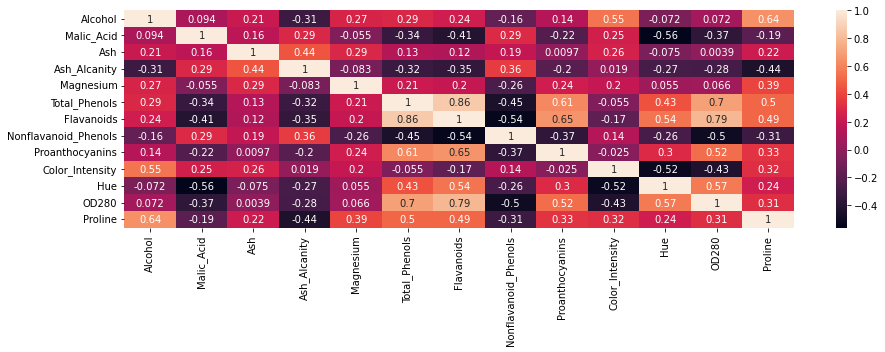

In [97]:
plt.figure(figsize=(15,4))
sns.heatmap(wine.corr(),annot=True)
plt.show()

**Observations**
- Proline is highly correlated with Alcohol, Total_phenols and Flavanoids as it is highly soluble in these liquids. Maybe that explains why.
- OD280 which is a measure of purity of a protein sample is correlated with Total-Phenols responsible for color, flavor and mouth-feel of wine, Flavanoids which is a subset of Total-phenols responsible for the color, Proanthocyanins and hue.
- High correlations also exist between Hue and Total-phenols, Flavanoids, and Proanthocyanins.


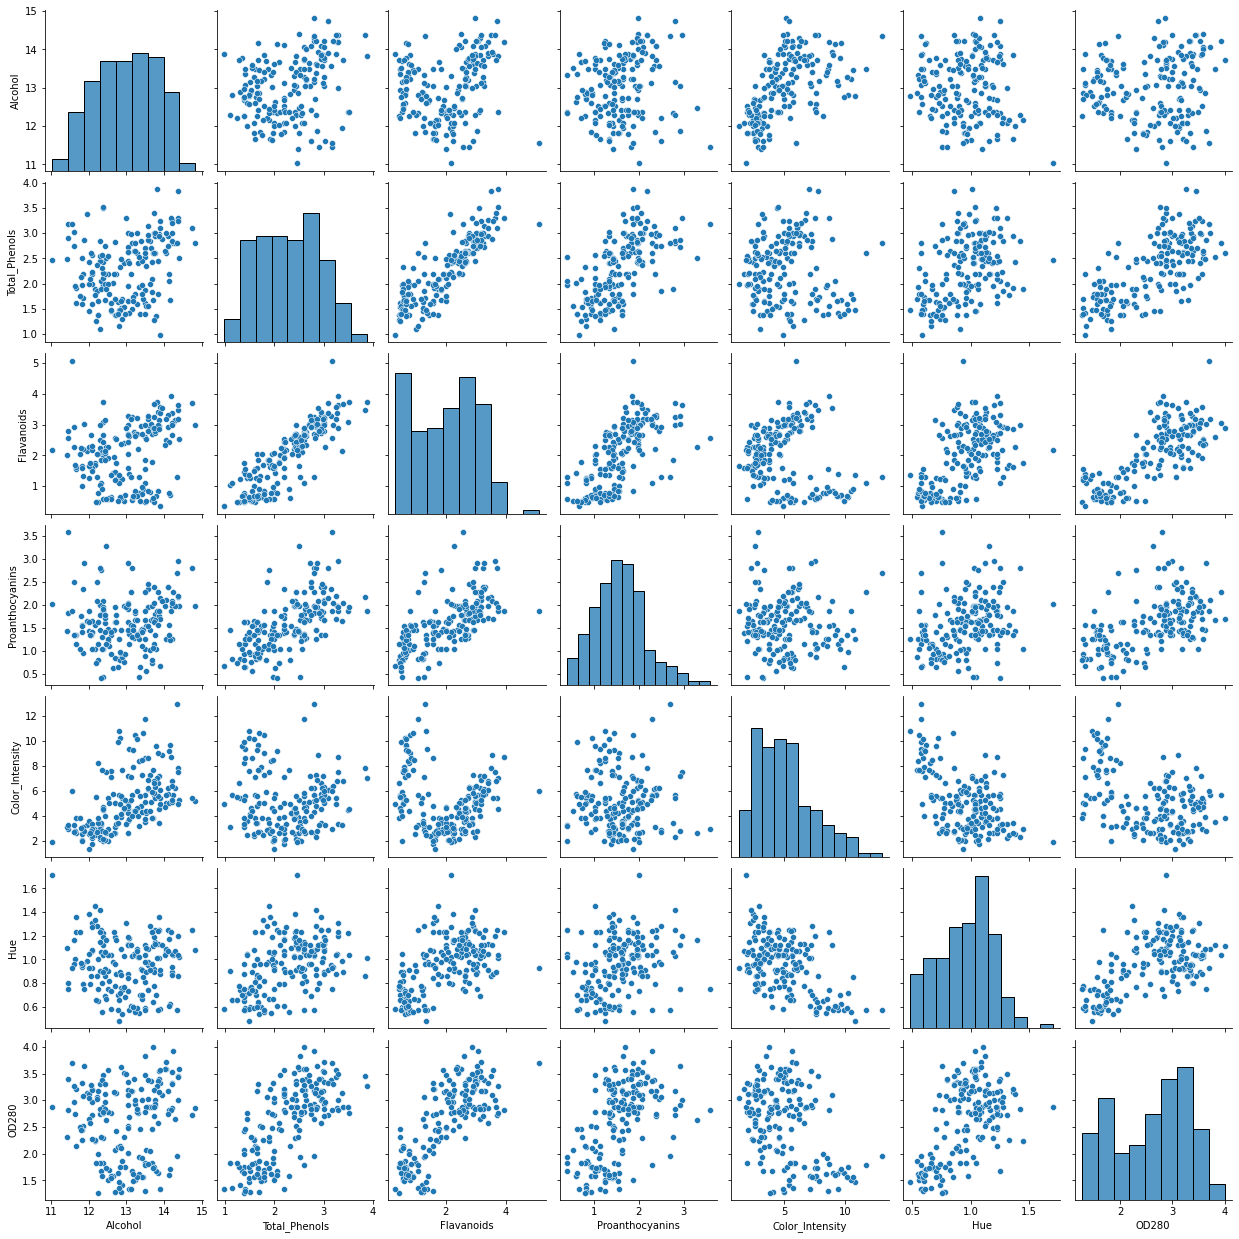

In [98]:
#scatter plot to visualize the positive correlations above
sns.pairplot(wine.iloc[:,[0,5,6,8,9,10,11]])
plt.show()

####  Starting on builiding the K-Means algorithim

#### *But before building the model we need to reduce the number of features using pca* 

In [99]:
#scalling the dataset and remember we need to change it into a dataframe
scaler=StandardScaler()
wine_scaled=pd.DataFrame(scaler.fit_transform(wine),columns=wine.columns)

In [100]:
#here we are finding the pca for the features in the dataset
n=wine_scaled.shape[1]

from sklearn.decomposition import PCA

#choosing the number of PCA's to generate so as to find the right number of pca's components to use
pca=PCA(n_components=n,random_state=1,)
wine_pca1=pd.DataFrame(pca.fit_transform(wine_scaled))

#finding the number of explained variance in the data
exp_var_ratio=pca.explained_variance_ratio_

In [101]:
exp_var_ratio

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

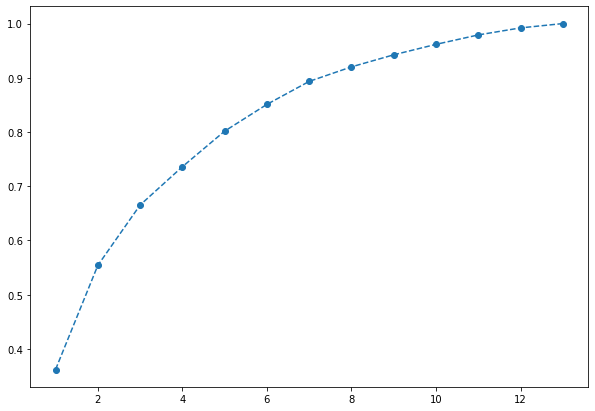

In [102]:
# visualize the explained variance by individual components
plt.figure(figsize=(10,7))
plt.plot(range(1,14),exp_var_ratio.cumsum(), marker='o',linestyle='--')
plt.show()

In [163]:
sum=0
for ix,i in enumerate(exp_var_ratio):
 sum=sum+i
 if(sum>0.50):
        print('The number of PCAs that explain more than 50% of the variance in the data is :', ix+1)
        break

The number of PCAs that explain more than 50% of the variance in the data is : 2


In [105]:
#now we create the 2 pca's
PCS=['PC1','PC2']
pca1 = PCA(n_components=2,random_state=1)
wine_pca=pd.DataFrame(pca1.fit_transform(wine_scaled),columns=PCS)
wine_pca

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


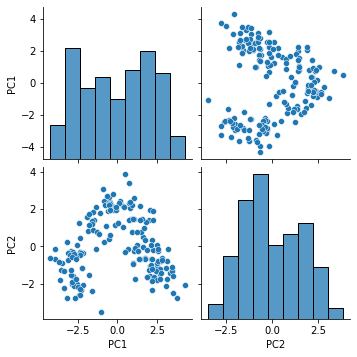

In [108]:
# Visualizing the now reduced features
sns.pairplot(wine_pca)
plt.show()

In [109]:
#making a copy of the the wine_pca data
wine_pca_copy=wine_pca.copy()

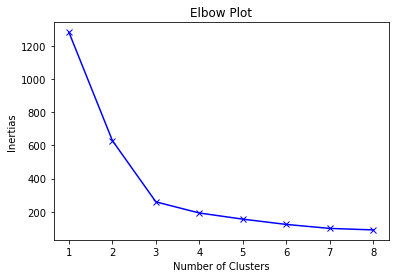

In [110]:
# determning the number of clusters to use

inertias = []

for d in range (1,9):
    kmeans = KMeans(n_clusters=d,random_state=1).fit(wine_pca_copy)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,9), inertias, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.title('Elbow Plot')
plt.show()

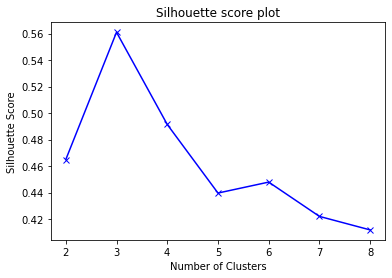

In [111]:
sc = [] 

for i in range (2,9):
    km = KMeans(n_clusters = i , random_state=1)
    km.fit(wine_pca_copy)
    labels = km.predict(wine_pca_copy)
    sc.append(silhouette_score(wine_pca_copy,labels))
    
plt.plot(range(2,9),sc,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score plot')
plt.show()

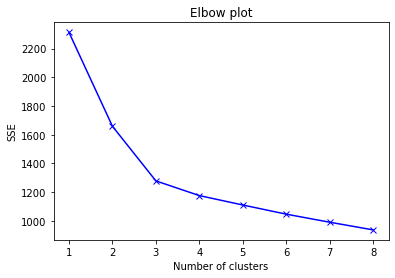

In [112]:
# same process as above but with different approach

sse={}
for d in range(1,9):
    kmean=KMeans(n_clusters=d,random_state=1).fit(wine_scaled)
    sse[d]=kmean.inertia_
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow plot')
plt.show()

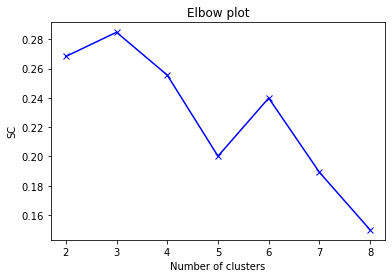

In [113]:
#lets use the silhouette score to determine the right number of clusters
sc={}
for k in range (2,9):
    kmeans=KMeans(n_clusters=k,random_state=1).fit(wine_scaled)
    labels=kmeans.predict(wine_scaled)
    sc[k]=silhouette_score(wine_scaled,labels)
    
plt.plot(list(sc.keys()),list(sc.values()),'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SC')
plt.title('Elbow plot')
plt.show()

**Observations**
- From the above plots we can choose the number of clusters to be 3 since silhouette score is highest at cluster 3


#### K-MEANS, LETS DO THIS 

In [114]:
km = KMeans(n_clusters=3,random_state=1)
km.fit(wine_pca_copy)

KMeans(n_clusters=3, random_state=1)

In [116]:
wine['KMeans_Labels'] = km.predict(wine_pca_copy)
wine_pca['KMeans_Labels'] = km.predict(wine_pca_copy)

y_means = km.predict(wine_pca_copy)

In [117]:
wine_pca.head()

,PC1,PC2,KMeans_Labels
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


In [118]:
wine_pca['KMeans_Labels'].value_counts()

2    65
0    64
1    49
Name: KMeans_Labels, dtype: int64

In [119]:
mean = wine_pca.groupby('KMeans_Labels').mean()
median = wine_pca.groupby('KMeans_Labels').median()
wine_df = pd.concat([mean,median],axis = 0)
wine_df.index = ['g0_mean','g1_mean','g2_mean','g0_median','g1_median','g2_median']
wine_df.T

,g0_mean,g1_mean,g2_mean,g0_median,g1_median,g2_median
PC1,2.266150,-2.743930,-0.162785,2.238350,-2.737151,-0.366267
PC2,-0.865592,-1.214191,1.767588,-0.893951,-1.160053,1.884592


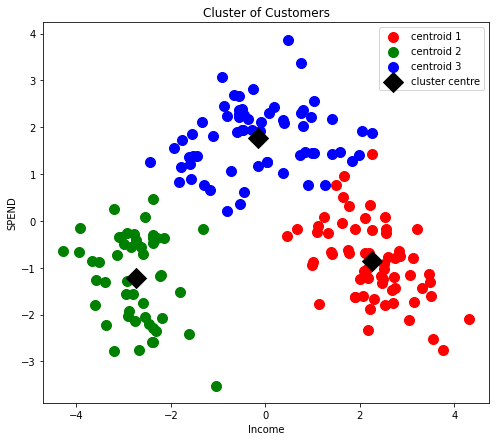

In [120]:
plt.figure(figsize=(8,7))

z= np.array(wine_pca)

plt.scatter(z[y_means == 0, 0], z[y_means == 0, 1], s=100, c='r', label='centroid 1')
plt.scatter(z[y_means == 1, 0], z[y_means == 1, 1], s=100, c='g', label='centroid 2')
plt.scatter(z[y_means == 2, 0], z[y_means == 2, 1], s=100, c='b', label='centroid 3' )


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200, c='black',marker='D',label='cluster centre')
plt.legend()
plt.title('Cluster of Customers')
plt.xlabel('Income')
plt.ylabel('SPEND')
plt.show()

In [121]:
PC = ['PC1','PC2']
wine_df1 = pd.DataFrame(np.round(pca1.components_[:2,:],2),columns=wine_scaled.columns[0:13],index=PC)
wine_df1.head().T

,PC1,PC2
Alcohol,0.14,-0.48
Malic_Acid,-0.25,-0.22
Ash,-0.00,-0.32
Ash_Alcanity,-0.24,0.01
Magnesium,0.14,-0.30
Total_Phenols,0.39,-0.07
Flavanoids,0.42,0.00
Nonflavanoid_Phenols,-0.30,-0.03
Proanthocyanins,0.31,-0.04
Color_Intensity,-0.09,-0.53


#### Dendrogram 

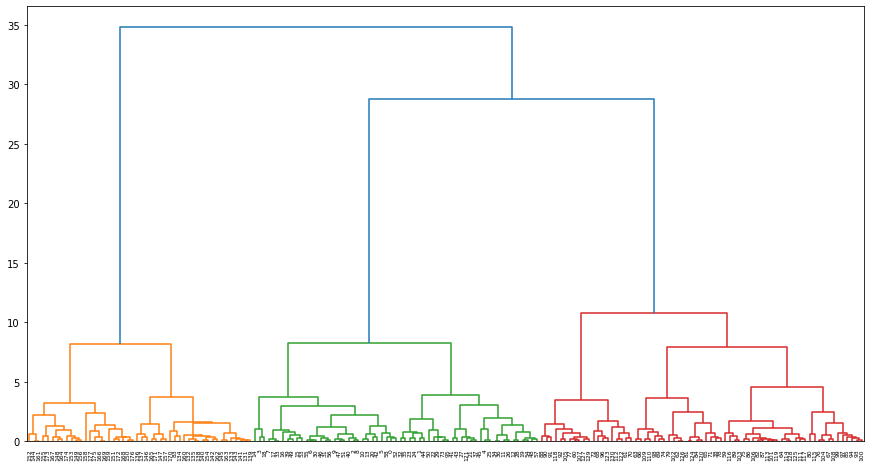

In [164]:

plt.figure(figsize=(15,8))
from scipy.cluster.hierarchy import linkage,dendrogram

label = wine.columns

mergings = linkage(wine_pca_copy, method='ward')

dendrogram(mergings,leaf_rotation=90,leaf_font_size=6,orientation='top')
plt.show()

### Conclusion 

- The wine chemical analysis in Italy truly were derived from three different cultivars.